In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('cleaned_forest_fires.csv')

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
#independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   Classes      243 non-null    int64  
 10  Region       243 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 21.0 KB


In [11]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<Axes: >

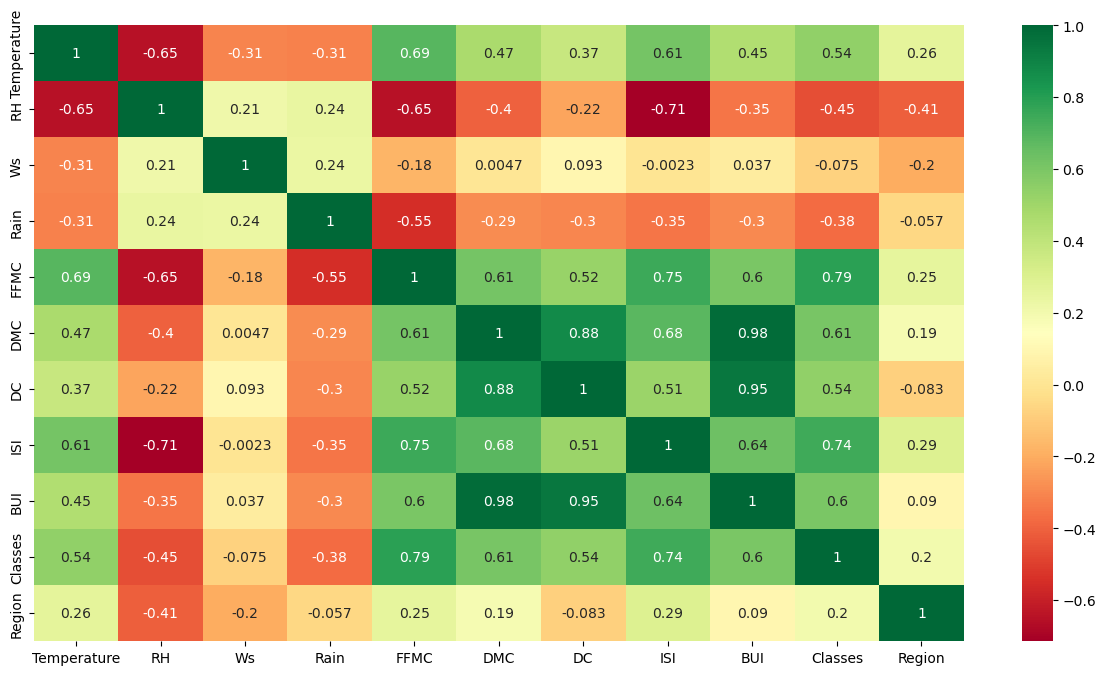

In [12]:
#feature selection based on correlation
plt.figure(figsize=(15,8))  
sns.heatmap(X_train.corr(),annot=True,cmap='RdYlGn')


In [13]:
#check for multicollinearity
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

print(correlation(X_train,0.85)) 


{'DC', 'BUI'}


In [14]:
##drop features with high multicollinearity
X_train.drop(['BUI','DC'],axis=1,inplace=True)
X_test.drop(['BUI','DC'],axis=1,inplace=True)

In [15]:
## Feature sca;ing, standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'After Scaling')

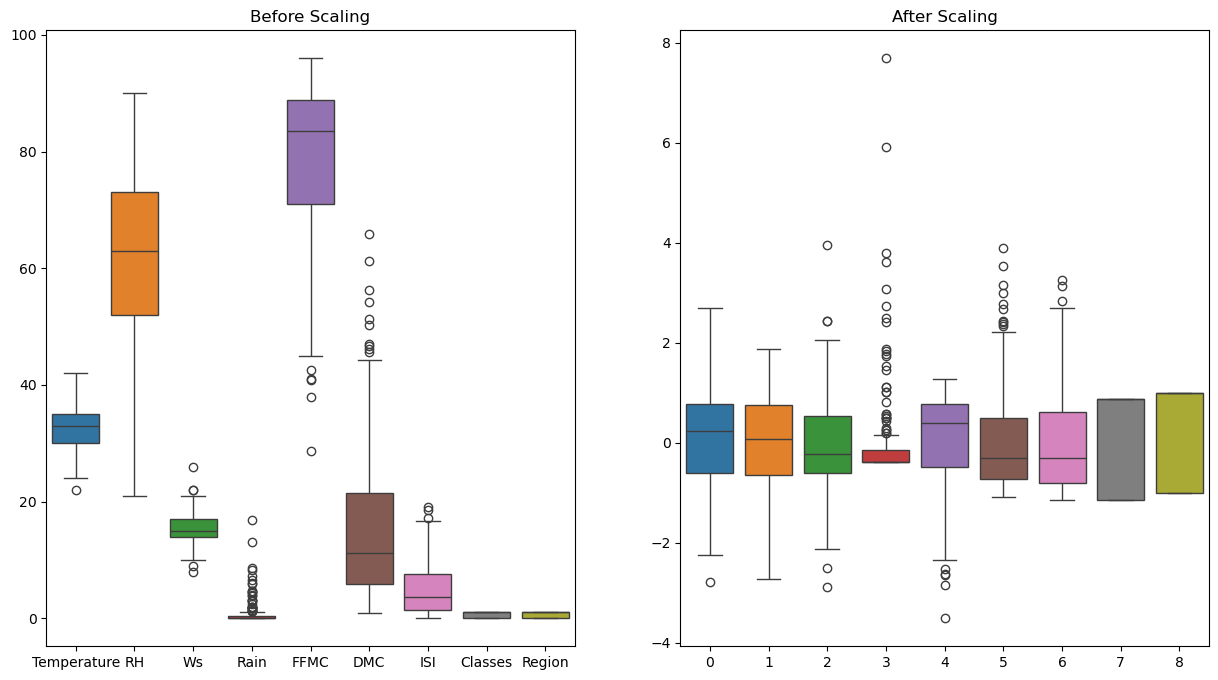

In [16]:
## Box Plots to see effect of scaling
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('After Scaling')

# Model training

1. Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred=lin_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [18]:
print("MAE:",mae)
print("MSE:",mse)   
print("RMSE:",rmse)
print("R2 Score:",r2)

MAE: 0.5049978694165665
MSE: 0.588299011070866
RMSE: 0.7670065260940522
R2 Score: 0.9805895859259883


Text(0.5, 0, 'Actual FWI')

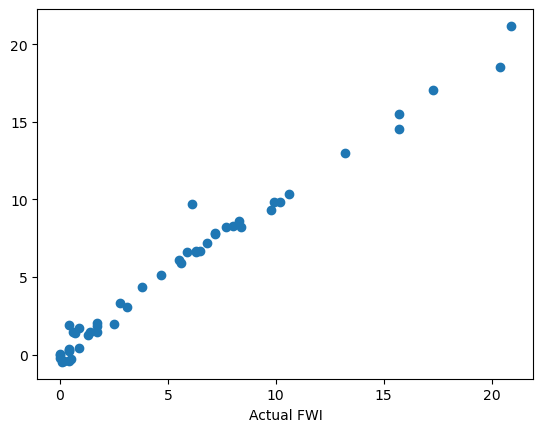

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual FWI')

2. Lasso Regression

MAE: 1.0093958923873403
MSE: 1.7260423250231405
RMSE: 1.3137893000870196
R2 Score: 0.9430507350726564


Text(0.5, 0, 'Actual FWI')

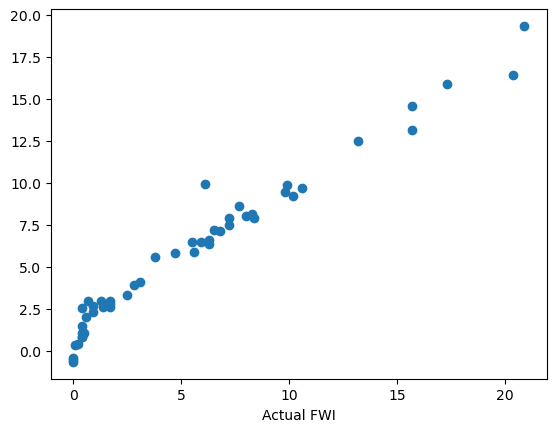

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lasso_reg=Lasso()
lasso_reg.fit(X_train_scaled,y_train)
y_pred=lasso_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual FWI')

In [21]:
#cross validation Lasso
from sklearn.linear_model import LassoCV
lasso_cv=LassoCV(alphas=None,cv=10,max_iter=10000)
lasso_cv.fit(X_train_scaled,y_train)

LassoCV(cv=10, max_iter=10000)

In [25]:
lasso_cv.alpha_

np.float64(0.025127375592682508)

MAE: 0.5247281651642637
R2 Score: 0.9798107002016329


Text(0.5, 0, 'Actual FWI')

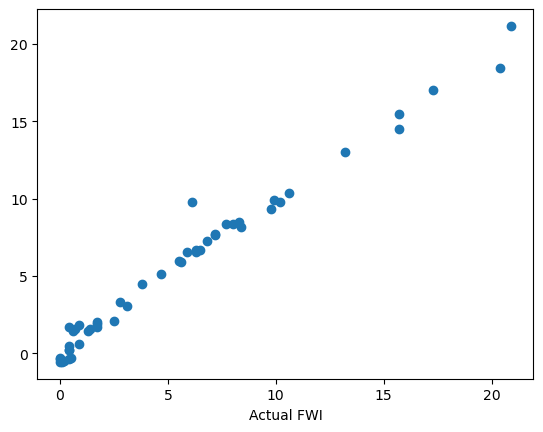

In [27]:
y_pred=lasso_cv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)  
r2=r2_score(y_test,y_pred)
print("MAE:",mae)   
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual FWI')

3. Ridge Regression

MAE: 0.5192048325844765
MSE: 0.6029616070548593
RMSE: 0.7765060251246344
R2 Score: 0.9801058063273601


Text(0.5, 0, 'Actual FWI')

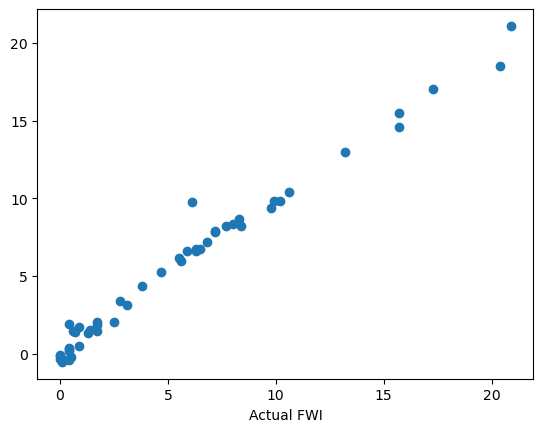

In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
ridge_reg=Ridge()
ridge_reg.fit(X_train_scaled,y_train)
y_pred=ridge_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print("MAE:",mae)
print("MSE:",mse)   
print("RMSE:",rmse)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual FWI')

MAE: 0.5760143790337652
MSE: 0.6657079116118901
R2 Score: 0.9780355465952401


Text(0.5, 0, 'Actual FWI')

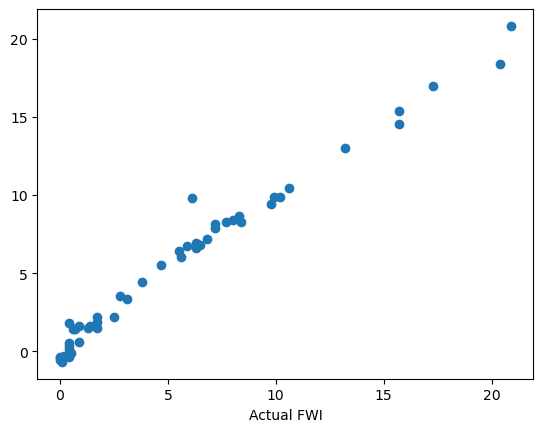

In [28]:
#cross validation Ridge
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(alphas=np.arange(0.001,100,1),cv=10)
ridge_cv.fit(X_train_scaled,y_train)
y_pred=ridge_cv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE:",mae)   
print("MSE:",mse)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual FWI')

In [33]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
        5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
        1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
        1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
        2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2.4001e+01,
        2.5001e+01, 2.6001e+01, 2.7001e+01, 2.8001e+01, 2.9001e+01,
        3.0001e+01, 3.1001e+01, 3.2001e+01, 3.3001e+01, 3.4001e+01,
        3.5001e+01, 3.6001e+01, 3.7001e+01, 3.8001e+01, 3.9001e+01,
        4.0001e+01, 4.1001e+01, 4.2001e+01, 4.3001e+01, 4.4001e+01,
        4.5001e+01, 4.6001e+01, 4.7001e+01, 4.8001e+01, 4.9001e+01,
        5.0001e+01, 5.1001e+01, 5.2001e+01, 5.3001e+01, 5.4001e+01,
        5.5001e+01, 5.6001e+01, 5.7001e+01, 5.8001e+01, 5.9001e+01,
        6.0001e+01, 6.1001e+01, 6.2001e+01, 6.3001e+01, 6.4001e+01,
        6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
        7.

4. ElasticNet Model

MAE: 1.6834416340136709
MSE: 4.009921298441002
RMSE: 2.0024787885121285
R2 Score: 0.8676961352267808


Text(0.5, 0, 'Actual FWI')

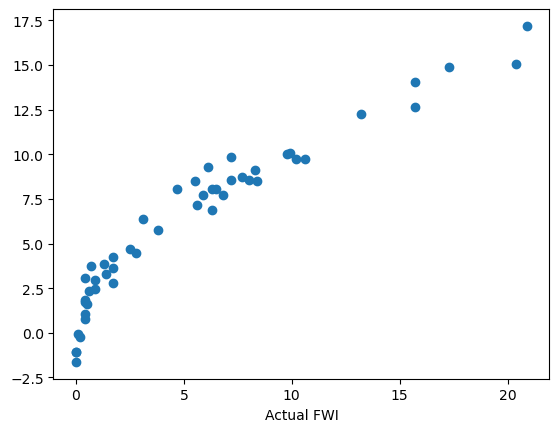

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
en_reg=ElasticNet()
en_reg.fit(X_train_scaled,y_train)
y_pred=en_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual FWI')


MAE: 0.5474580785252846
MSE: 0.6327837511925455
R2 Score: 0.9791218506255925


Text(0.5, 0, 'Actual FWI')

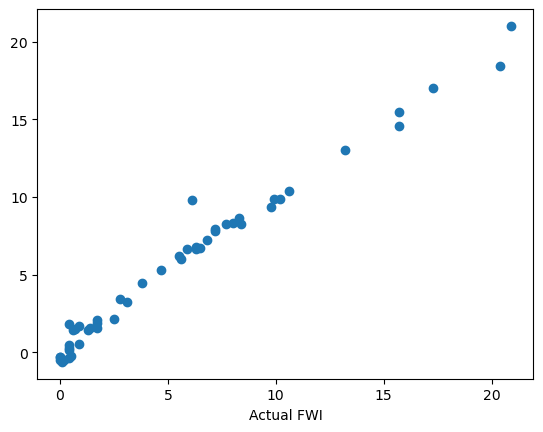

In [34]:
#cross validation elastic net
from sklearn.linear_model import ElasticNetCV
elastic_cv=ElasticNetCV(alphas=None,cv=10,max_iter=10000)
elastic_cv.fit(X_train_scaled,y_train)
y_pred=elastic_cv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual FWI')

In [35]:
elastic_cv.alpha_

np.float64(0.018920591219922695)